In [2]:
import requests
from bs4 import BeautifulSoup
import time
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Web scrapping des threads de 4chan

In [3]:
with open("../scrapes/categories_4chan.html") as f1:
    soup1 = BeautifulSoup(f1, 'html.parser')
    content1 = soup1.findAll("a", {"class":"boardlink"})
    categories = {
                    re.sub("//boards.4chan.org/|//boards.4channel.org/|/","",category.get('href')) : category.text 
                    for category in content1 if category.text != ""
                 }

In [4]:
categories

{'a': 'Anime & Manga',
 'c': 'Anime/Cute',
 'w': 'Anime/Wallpapers',
 'm': 'Mecha',
 'cgl': 'Cosplay & EGL',
 'cm': 'Cute/Male',
 'f': 'Flash',
 'n': 'Transportation',
 'jp': 'Otaku Culture',
 'vt': 'Virtual YouTubers',
 'v': 'Video Games',
 'vg': 'Video Game Generals',
 'vm': 'Video Games/Multiplayer',
 'vmg': 'Video Games/Mobile',
 'vp': 'Pokémon',
 'vr': 'Retro Games',
 'vrpg': 'Video Games/RPG',
 'vst': 'Video Games/Strategy',
 'co': 'Comics & Cartoons',
 'g': 'Technology',
 'tv': 'Television & Film',
 'k': 'Weapons',
 'o': 'Auto',
 'an': 'Animals & Nature',
 'tg': 'Traditional Games',
 'sp': 'Sports',
 'xs': 'Extreme Sports',
 'pw': 'Professional Wrestling',
 'sci': 'Science & Math',
 'his': 'History & Humanities',
 'int': 'International',
 'out': 'Outdoors',
 'toy': 'Toys',
 'i': 'Oekaki',
 'po': 'Papercraft & Origami',
 'p': 'Photography',
 'ck': 'Food & Cooking',
 'ic': 'Artwork/Critique',
 'wg': 'Wallpapers/General',
 'lit': 'Literature',
 'mu': 'Music',
 'fa': 'Fashion',
 '3'

In [5]:
headers = {"user-agent": "toto"}
response = requests.get("https://httpbin.org/user-agent", headers=headers)
response.json()

{'user-agent': 'toto'}

In [7]:
with open("../scrapes/4chan_quotes.json", "r") as f2:
    data = json.load(f2)
    for acronym, category in categories.items():
        url = 'https://boards.4channel.org/{}'.format(acronym)
        time.sleep(5)
        r = requests.post(url, headers=headers)
        soup3 = BeautifulSoup(r.text, 'html.parser')
        corpus = soup3.findAll("blockquote")

        for content in corpus:
            try:
                quote={}
                quote["Category"] = category
                quote["Acronym Category"] = acronym
                quote["Reply"] = re.sub("[>>0-9]", "", content.text)
            except IndexError:
                pass
            data.append(quote)

In [8]:
data[:10]

[{'Category': 'Random',
  'Acronym Category': 'b',
  'Reply': "Second round: ROLL for your fate after you land on planet Laakan. NO REROLL UNLESS TOLD OTHERWISE. Currency is space buck (sb). You start with zero sb, once back on earth you'll be able to exchange your space bucks for usd.  sb=. usd. Good luck."},
 {'Category': 'Random',
  'Acronym Category': 'b',
  'Reply': 'Vasquez, take this fucker down. Reroll!'},
 {'Category': 'Random', 'Acronym Category': 'b', 'Reply': 'rollerrino'},
 {'Category': 'Random', 'Acronym Category': 'b', 'Reply': 'Rollino'},
 {'Category': 'Random',
  'Acronym Category': 'b',
  'Reply': 'Visible face edition'},
 {'Category': 'Random',
  'Acronym Category': 'b',
  'Reply': 'It’s a good day to have eyes'},
 {'Category': 'Random',
  'Acronym Category': 'b',
  'Reply': "Dude. Look at how high up the nipples are.They have no sag.They're awful implants.She should honestly sue for a refund to get them redone."},
 {'Category': 'Random',
  'Acronym Category': 'b',
 

In [9]:
with open("../scrapes/4chan_quotes.json", "w") as f3:
        json.dump(data, f3, indent=4, separators=(',',': '))

# Data wrangling/crawling des topics extraits

In [10]:
df = pd.read_json("../scrapes/4chan_quotes.json", orient='records')
df.head(10)

,Category,Acronym Category,Reply
0,Random,b,Second round: ROLL for your fate after you lan...
1,Random,b,"Vasquez, take this fucker down. Reroll!"
2,Random,b,rollerrino
3,Random,b,Rollino
4,Random,b,Visible face edition
5,Random,b,It’s a good day to have eyes
6,Random,b,Dude. Look at how high up the nipples are.They...
7,Random,b,I’ll nudity any pics of any girl no matter how...
8,Random,b,"Hottest girl I know, always wanted to see nudes"
9,Random,b,This is a woman. Her pronouns are She / Her.


In [11]:
df.info()
df.loc[df['Reply'] == ''].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28852 entries, 0 to 28851
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Category          28852 non-null  object
 1   Acronym Category  28852 non-null  object
 2   Reply             28852 non-null  object
dtypes: object(3)
memory usage: 676.3+ KB


Category            4689
Acronym Category    4689
Reply               4689
dtype: int64

In [12]:
df.drop(df.loc[(df['Reply'] == '') | (df['Reply'] == ' ')].index, inplace=True)
df['Reply'] = df['Reply'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex = True)

In [13]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.loc[df['Reply'].duplicated()][:10]

,Category,Acronym Category,Reply
1055,Hardcore,hc,Nice
1182,Cams & Meetups,soc,"Hi everyone, my name is Natasha, I am y o. I ..."
1187,Cams & Meetups,soc,bump
1297,Random,b,bump
1315,Hentai/Alternative,d,Bump
1326,Hentai/Alternative,d,Source?
1459,Hentai,h,Based
1465,High Resolution,hr,Bump
1592,Artwork/Critique,ic,based
1767,Handsome Men,hm,Source?


In [14]:
df.drop_duplicates(inplace=True)

# Tokenization des mots les plus impactants des threads 4chan

In [15]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
!py -m pip install nltk

You should consider upgrading via the 'C:\Users\Othmane\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [17]:
stop_words = set(STOPWORDS)
words = ""

for quote in df['Reply']: 
    tokens = quote.split()
    tokens = [token.lower() for token in tokens if token.isalpha()]
    words += " ".join(tokens)

In [18]:
freq_words = FreqDist(words.split())
freq_words.most_common(10)

[('the', 12395),
 ('to', 10310),
 ('a', 8954),
 ('and', 8599),
 ('of', 6250),
 ('i', 5918),
 ('you', 5379),
 ('is', 5130),
 ('in', 4393),
 ('for', 3717)]

In [19]:
tokinizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')
freq = tokinizer.tokenize(words)

In [20]:
new_tokens = [token for token in freq if token not in nltk.corpus.stopwords.words('english')]

In [21]:
new_tokens[:20]

['second',
 'roll',
 'fate',
 'land',
 'planet',
 'reroll',
 'unless',
 'told',
 'currency',
 'space',
 'buck',
 'start',
 'zero',
 'back',
 'earth',
 'able',
 'exchange',
 'space',
 'bucks',
 'goodtake']

In [22]:
new_freq_words = FreqDist(new_tokens)
new_freq_words.most_common(50)

[('like', 2085),
 ('get', 1107),
 ('one', 984),
 ('would', 902),
 ('people', 869),
 ('even', 813),
 ('want', 805),
 ('think', 742),
 ('make', 683),
 ('know', 671),
 ('good', 599),
 ('see', 567),
 ('really', 562),
 ('fucking', 543),
 ('thread', 510),
 ('also', 509),
 ('got', 482),
 ('post', 474),
 ('time', 467),
 ('could', 455),
 ('going', 448),
 ('still', 442),
 ('much', 440),
 ('go', 431),
 ('never', 430),
 ('need', 423),
 ('love', 421),
 ('shit', 417),
 ('fuck', 408),
 ('looking', 398),
 ('something', 384),
 ('view', 377),
 ('way', 374),
 ('find', 373),
 ('look', 373),
 ('click', 364),
 ('new', 362),
 ('getting', 343),
 ('someone', 343),
 ('anything', 337),
 ('every', 337),
 ('feel', 331),
 ('back', 320),
 ('actually', 316),
 ('women', 316),
 ('art', 310),
 ('girl', 297),
 ('made', 296),
 ('take', 291),
 ('work', 289)]

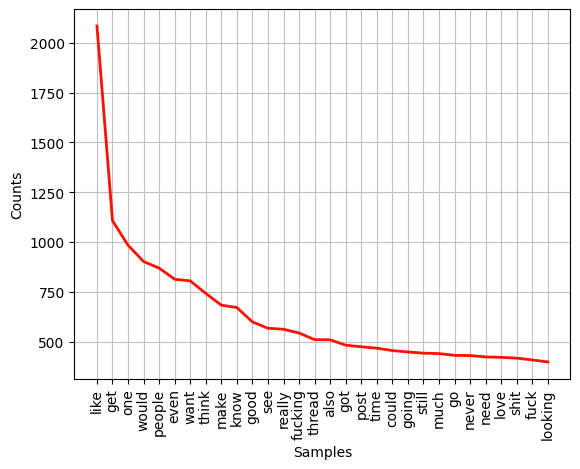

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
new_freq_words.plot(30, color = "#FF1000")

In [24]:
counts = dict(Counter(new_freq_words).most_common(30))
labels, values = zip(*counts.items())

index_sorted = np.argsort(values)[::-1]
labels = np.array(labels)[index_sorted]
values = np.array(values)[index_sorted]
indexs = np.arange(len(labels))

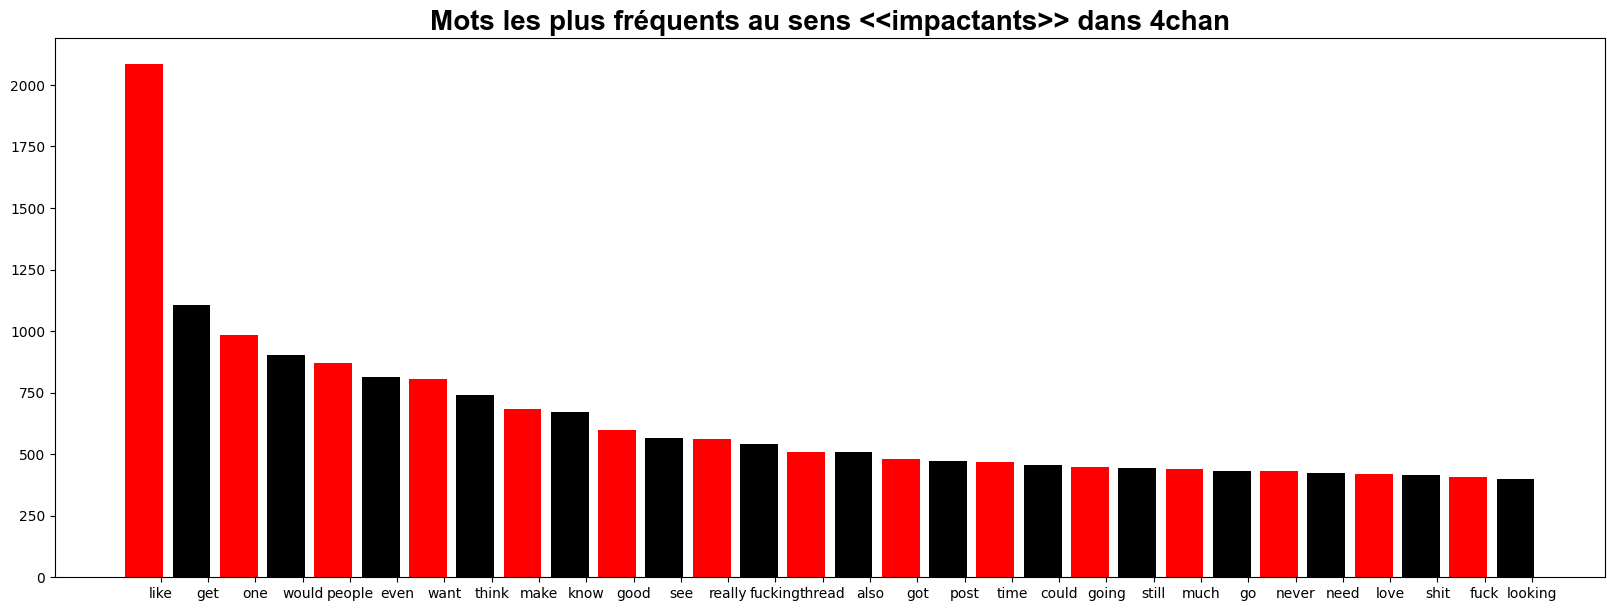

In [25]:
bar_width = 0.35
plt.figure(figsize=(20,7))
plt.bar(indexs, values, color = ["#FF0000", "#000000"], lw=1.2)
plt.xticks(indexs + bar_width, labels)
plt.title("Mots les plus fréquents au sens <<impactants>> dans 4chan", fontname="Arial", size=20, fontweight="bold")
plt.show()

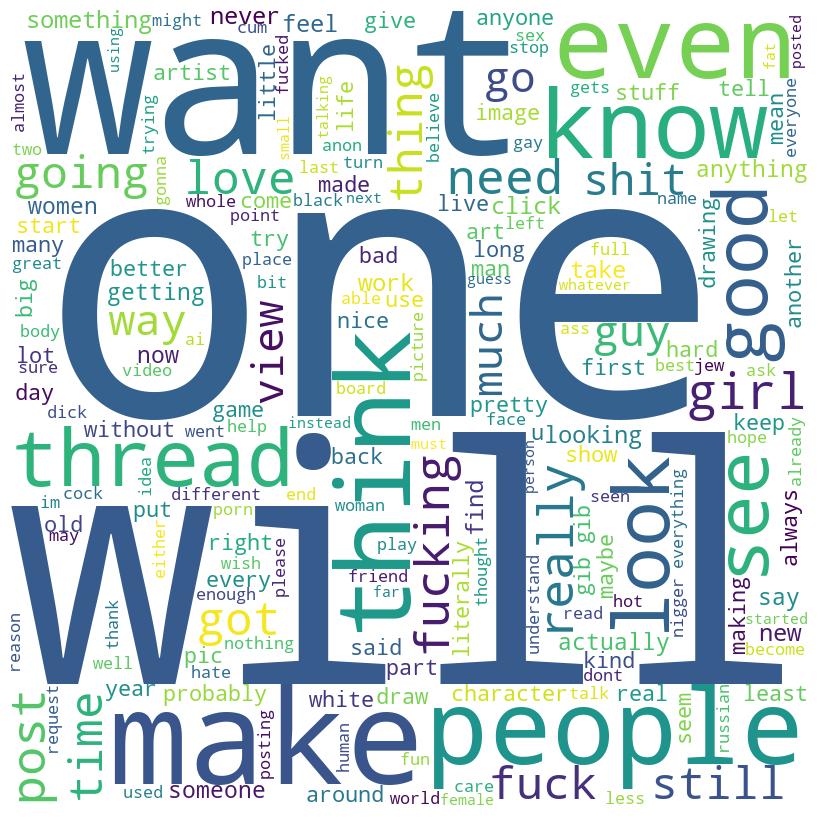

In [26]:
wordcloud = WordCloud(width = 800,
                      height = 800, 
                      background_color ='white', 
                      stopwords = stop_words, 
                      min_font_size = 10).generate(words) 

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Prédiction du score de polarité des phrases des topics

## Prédiction par la technique de NLP VADER Sentiment Analysis

In [27]:
sentiment_object = SentimentIntensityAnalyzer()

In [28]:
sentiment_score = {index : {data["Reply"] : sentiment_object.polarity_scores(data["Reply"])} for index, data in df.iterrows()} 
list(sentiment_score.items())[:10]

[(0,
  {"Second round: ROLL for your fate after you land on planet Laakan. NO REROLL UNLESS TOLD OTHERWISE. Currency is space buck (sb). You start with zero sb, once back on earth you'll be able to exchange your space bucks for usd.  sb=. usd. Good luck.": {'neg': 0.058,
    'neu': 0.826,
    'pos': 0.116,
    'compound': 0.4528}}),
 (1,
  {'Vasquez, take this fucker down. Reroll!': {'neg': 0.52,
    'neu': 0.48,
    'pos': 0.0,
    'compound': -0.7519}}),
 (2, {'rollerrino': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}),
 (3, {'Rollino': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}),
 (4,
  {'Visible face edition': {'neg': 0.0,
    'neu': 1.0,
    'pos': 0.0,
    'compound': 0.0}}),
 (5,
  {'It’s a good day to have eyes': {'neg': 0.0,
    'neu': 0.633,
    'pos': 0.367,
    'compound': 0.4404}}),
 (6,
  {"Dude. Look at how high up the nipples are.They have no sag.They're awful implants.She should honestly sue for a refund to get them redone.": {'neg': 0.184,
    'n

In [29]:
df['Compound Score'] = pd.to_numeric(df['Reply'].apply(lambda data : sentiment_object.polarity_scores(data)['compound']))
df['Polarity'] = np.where(df['Compound Score'] >= 0.05, 'Positive',(np.where(df['Compound Score'] <= -0.05, 'Negative', 'Neutral')))

In [30]:
df[:10]

,Category,Acronym Category,Reply,Compound Score,Polarity
0,Random,b,Second round: ROLL for your fate after you lan...,0.4528,Positive
1,Random,b,"Vasquez, take this fucker down. Reroll!",-0.7519,Negative
2,Random,b,rollerrino,0.0000,Neutral
3,Random,b,Rollino,0.0000,Neutral
4,Random,b,Visible face edition,0.0000,Neutral
5,Random,b,It’s a good day to have eyes,0.4404,Positive
6,Random,b,Dude. Look at how high up the nipples are.They...,-0.2960,Negative
7,Random,b,I’ll nudity any pics of any girl no matter how...,0.8516,Positive
8,Random,b,"Hottest girl I know, always wanted to see nudes",0.0000,Neutral
9,Random,b,This is a woman. Her pronouns are She / Her.,0.0000,Neutral


Text(0.5, 1.0, 'Fréquence des polarités dans tous les topics')

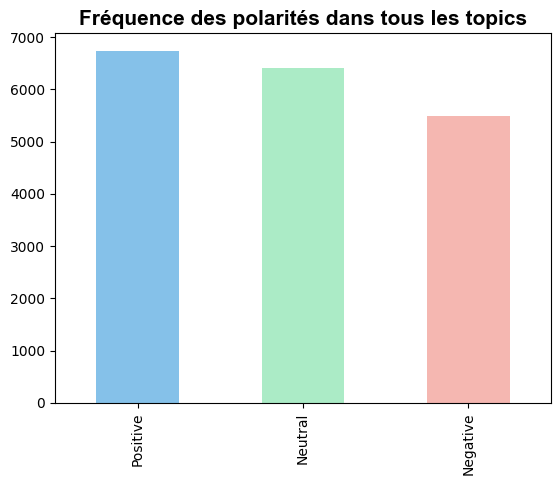

In [31]:
df['Polarity'].value_counts().plot(kind='bar', color = ["#85C1E9","#ABEBC6","#F5B7B1"])
plt.title("Fréquence des polarités dans tous les topics", fontname="Arial", size=15, fontweight="bold")

Text(0.5, 1.0, 'Fréquence de la polarité neutre par catégorie')

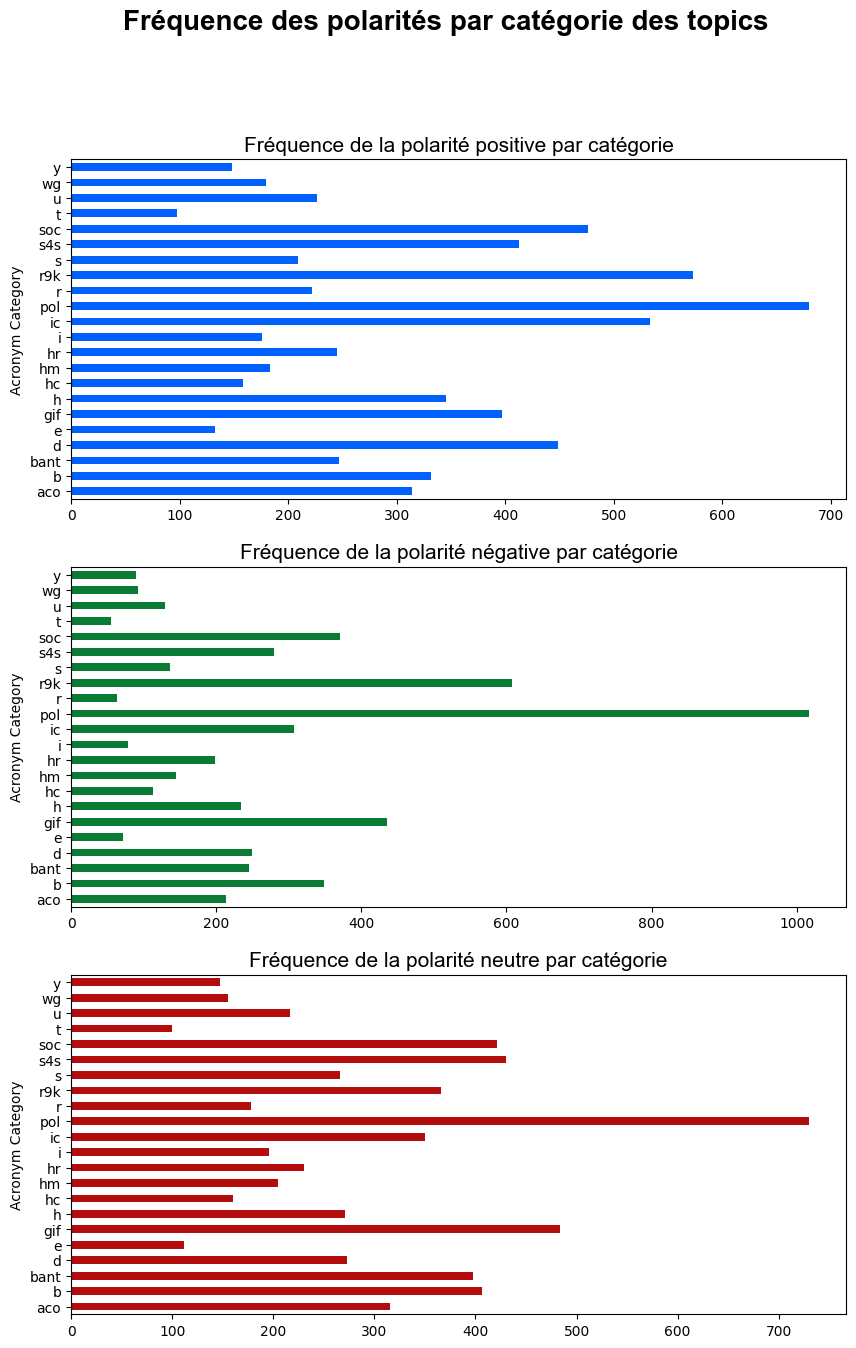

In [32]:
df_positive = df.loc[(df['Polarity'] == 'Positive')]
df_negative = df.loc[(df['Polarity'] == 'Negative')]
df_neutral = df.loc[(df['Polarity'] == 'Neutral')]                  
                     
fig, axes = plt.subplots(3, figsize=(10,15))
fig.suptitle("Fréquence des polarités par catégorie des topics", fontname="Arial", size=20, fontweight="bold")

df_positive.groupby(['Acronym Category'])['Polarity'].count().plot(kind='barh', ax=axes[0], color = '#0061FF')
axes[0].set_title("Fréquence de la polarité positive par catégorie", fontname="Arial", size=15)
df_negative.groupby(['Acronym Category'])['Polarity'].count().plot(kind='barh', ax=axes[1], color = '#097B34')
axes[1].set_title("Fréquence de la polarité négative par catégorie", fontname="Arial", size=15)
df_neutral.groupby(['Acronym Category'])['Polarity'].count().plot(kind='barh', ax=axes[2], color = '#B20C0C')
axes[2].set_title("Fréquence de la polarité neutre par catégorie", fontname="Arial", size=15)

## Prédiction par classification naïve bayésienne

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [43]:
vectorizer = TfidfVectorizer(lowercase=True, strip_accents='ascii')

X = vectorizer.fit_transform(df['Reply'][:1000])
y = np.append(np.ones(len(df.sort_values('Compound Score', ascending=False)['Reply'].head(500))), 
              np.zeros(len(df.sort_values('Compound Score', ascending=True)['Reply'].head(500)))
             )

C:\Users\Othmane\AppData\Local\Temp\ipykernel_11376\1692696137.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X = vectorizer.fit_transform(df['Reply'][:1000])


In [44]:
X.shape, y.shape

((1000, 4899), (1000,))

In [47]:
#y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [48]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [49]:
param_grid = {
    'fit_prior': np.logspace(0,-9, num=100)
}

In [50]:
clf = GridSearchCV(classifier, param_grid = param_grid, cv = 10, verbose=1, n_jobs=-1)
best_classifier = clf.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [51]:
best_classifier.best_estimator_

MultinomialNB(fit_prior=1.0)

In [52]:
best_classifier.score(X_train, y_train)

0.986

In [53]:
best_classifier.predict_proba(X_test)[:10]

array([[0.51510216, 0.48489784],
       [0.60260024, 0.39739976],
       [0.47233961, 0.52766039],
       [0.44105099, 0.55894901],
       [0.6646726 , 0.3353274 ],
       [0.5182227 , 0.4817773 ],
       [0.53079791, 0.46920209],
       [0.48983289, 0.51016711],
       [0.60508024, 0.39491976],
       [0.63060437, 0.36939563]])

In [54]:
y_pred = best_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [55]:
cm

array([[193,  50],
       [143, 114]], dtype=int64)

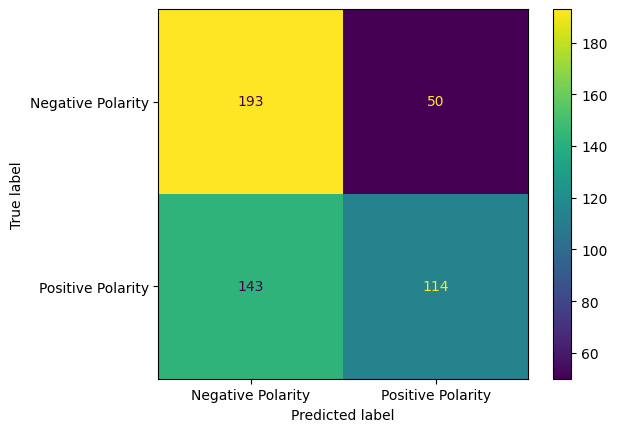

In [56]:
cm_plot = ConfusionMatrixDisplay(cm, display_labels = ["Negative Polarity", "Positive Polarity"])
cm_plot.plot()
plt.show()

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.79      0.67       243
         1.0       0.70      0.44      0.54       257

    accuracy                           0.61       500
   macro avg       0.63      0.62      0.60       500
weighted avg       0.64      0.61      0.60       500



In [58]:
roc_auc_score(y_test, y_pred)

0.6189092248322686